# Waiting time distributions
## Nikolas Schnellbächer (2018-08-14)

In [246]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [247]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [248]:
# this is how we can use python to sample from an exponential distribution
# with a given mean value (here meanTime)
meanTime = 1.5
sampleTime = np.random.exponential(meanTime)
print("sample waiting time =", sampleTime)

sample waiting time = 0.2586430977796442


In [249]:
# specify the number of samples
nSamples = 5000
meanTime = 1.5
sampleTimes = np.random.exponential(meanTime, nSamples)

assert sampleTimes.shape == (nSamples,), "Error: Shape assertion failed."
print(sampleTimes.shape)

(5000,)


Next we create the theoretical distribution, which for this case is of course the standard probability density function of the exponential distribution.

In [250]:
# create the theoretical exponential distribution
nVisPoints = 300
meanValue = meanTime
xVals = np.linspace(0.0, 15.0, nVisPoints)
yVals = np.array([np.exp(-t / meanValue) / meanValue for t in xVals])
expDist = np.zeros((nVisPoints, 2))
expDist[:, 0] = xVals
expDist[:, 1] = yVals

In [251]:
# for an alternative histogram representation I
# create x,y data pairs of the histogram data using
# numpy's histogram function
nBins = 20
hist, bin_edges = np.histogram(sampleTimes, bins = nBins, normed = True)
bin_centers = (bin_edges[1:] + bin_edges[0:-1]) / 2.0
assert hist.shape == bin_centers.shape

scatterData = np.zeros((nBins, 2))
scatterData[:, 0] = bin_centers
scatterData[:, 1] = hist

In [252]:
# plotting function to plot the numerically sampled data 
# in conjunction with the exponential distribution

def plot_histogram_wDist(X, nBins, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.hist(X,
            bins = nBins,
            density = True,
            label = r'sampled')
    
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$\mathrm{Exp}(\lambda = \langle t\rangle)$')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 14.25)
    ax.set_ylim(0.0, 0.625)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

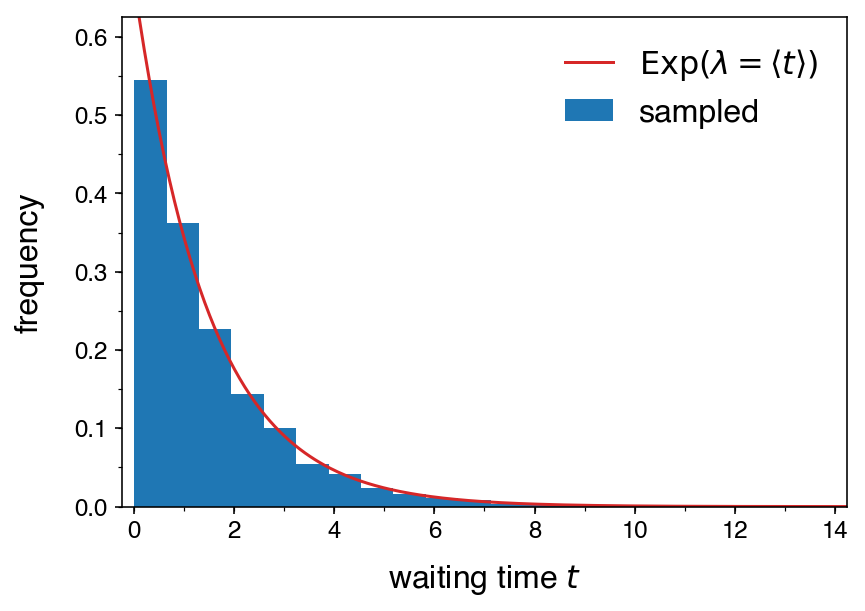

In [253]:
nBins = 20
plot_histogram_wDist(sampleTimes, nBins, expDist)

In [254]:
# plotting function to show that both version of the histogram
# of course perfectly overlay each other

def plot_histogram_comparison(X, nBins, scatterData, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.hist(X,
            bins = nBins,
            density = True,
            label = r'sampled',
            zorder = 1)
    
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$\mathrm{Exp}(\lambda = \langle t\rangle)$',
            zorder = 3)
    
    ax.scatter(scatterData[:, 0], scatterData[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C3',
               zorder = 2)
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 14.25)
    ax.set_ylim(0.0, 0.625)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

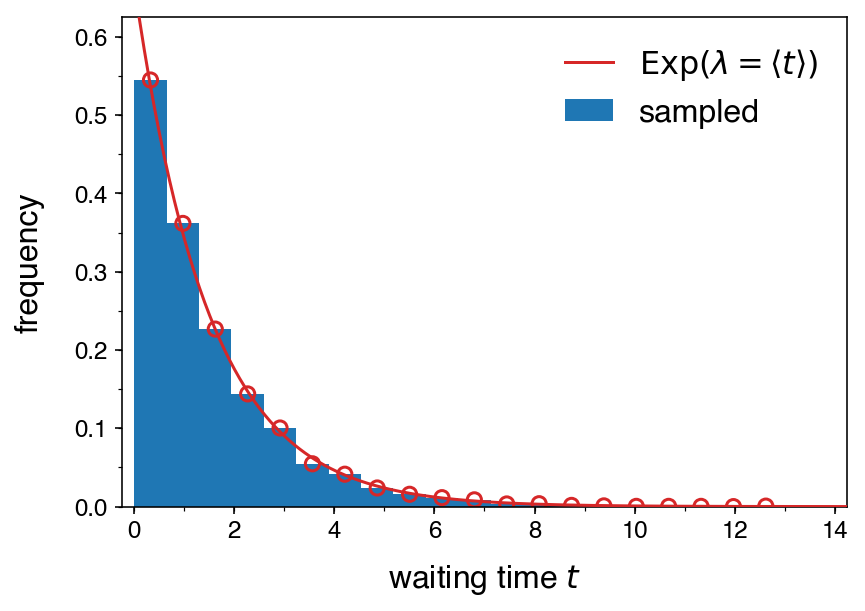

In [255]:
nBins = 20
plot_histogram_comparison(sampleTimes, nBins, scatterData, dist)

In [256]:
def plot_scatter_histogram(X, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.plot([-1.0, 20.0], [0.0, 0.0],
            dashes = [6.0, 3.0],
            color = '#CCCCCC',
            lw = 1.0,
            zorder = 1)
        
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$\mathrm{Exp}(\lambda = \langle t\rangle)$',
            zorder = 3)
    
    ax.scatter(X[:, 0], X[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C3',
               zorder = 2,
               label = r'sampled')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 14.25)
    ax.set_ylim(-0.025, 0.625)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

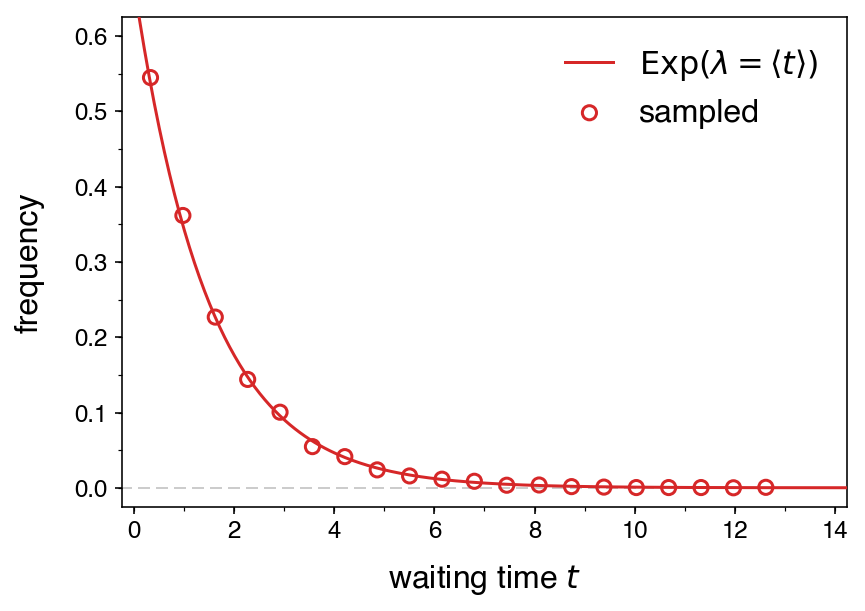

In [257]:
plot_scatter_histogram(scatterData, dist)

Next we consider a two-step process. The first process has a mean waiting time $\tau_A$ and the second process a mean waiting time $\tau_B$.

In [258]:
# set the mean waiting times for the two-step process
tau_A = 1.0
tau_B = 1.5

# specify the number of samples
nSamples = 500000

tauAs = np.random.exponential(tau_A, nSamples)
tauBs = np.random.exponential(tau_B, nSamples)
assert tauAs.shape == tauBs.shape

observedTimes = tauAs + tauBs # a sequential two step process
assert observedTimes.shape == (nSamples,), "Error: Shape assertion failed."
print(observedTimes.shape)

(500000,)


In [259]:
# create the theoretical distribution
# Here this distribution is the convolution of two exponential distributions.
nVisPoints = 300
tau_A = 1.0
tau_B = 1.5
xVals = np.linspace(0.0, 20.0, nVisPoints)
yVals = np.array([(np.exp(-t / tau_B) - np.exp(-t / tau_A)) / (tau_B - tau_A) for t in xVals])
dist2 = np.zeros((nVisPoints, 2))
dist2[:, 0] = xVals
dist2[:, 1] = yVals

In [260]:
# for an alternative histogram representation I
# create x,y data pairs of the histogram data using
# numpy's histogram function
nBins = 40
hist, bin_edges = np.histogram(observedTimes, bins = nBins, normed = True)
bin_centers = (bin_edges[1:] + bin_edges[0:-1]) / 2.0
assert hist.shape == bin_centers.shape

scatterData2 = np.zeros((nBins, 2))
scatterData2[:, 0] = bin_centers
scatterData2[:, 1] = hist

In [261]:
# plotting function to plot the numerically sampled data 
# in conjunction with the exponential distribution

def plot_histogram_wDist_2step(X, nBins, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.hist(X,
            bins = nBins,
            density = True,
            label = r'sampled')
    
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$p(t)$')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 15.75)
    ax.set_ylim(0.0, 0.315)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

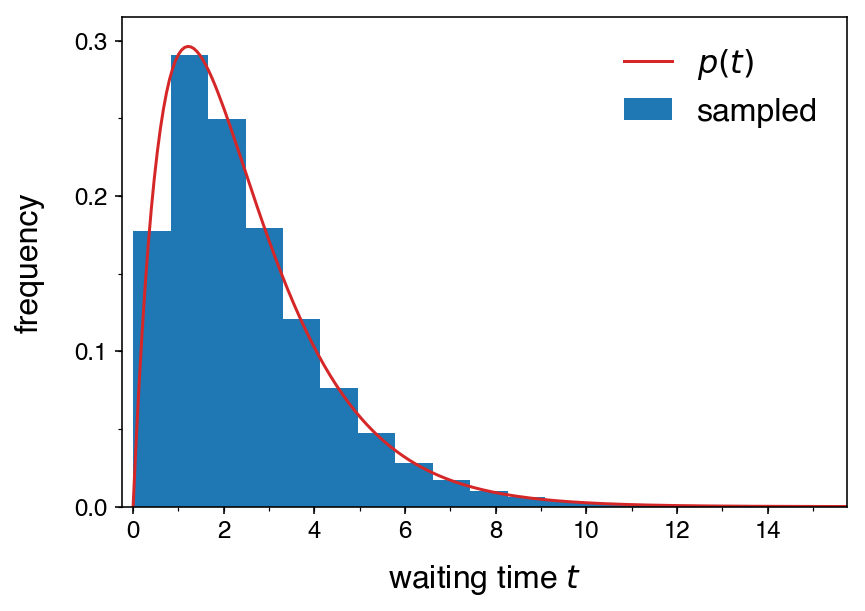

In [262]:
nBins = 30
plot_histogram_wDist_2step(observedTimes, nBins, dist2)

In [263]:
def plot_scatter_histogram(X, dist):
    
    fig, ax = plt.subplots(1, 1, figsize = (6.5, 4.5))
    
    ax.plot([-1.0, 20.0], [0.0, 0.0],
            dashes = [6.0, 3.0],
            color = '#CCCCCC',
            lw = 1.0,
            zorder = 1)
        
    ax.plot(dist[:, 0], dist[:, 1],
            lw = 1.5,
            color = 'C3',
            label = r'$p(t)$',
            zorder = 3)
    
    ax.scatter(X[:, 0], X[:, 1],
               s = 50,
               lw = 1.5,
               facecolor = 'None',
               edgecolor = 'C3',
               zorder = 2,
               label = r'sampled')
    
    ax.set_xlabel(r'waiting time $t$', fontsize = 16.0)
    ax.set_ylabel(r'frequency', fontsize = 16.0)
    ax.xaxis.labelpad = 10.0
    ax.yaxis.labelpad = 15.0
    
    major_x_ticks = np.arange(0.0, 15.1, 2.0)
    minor_x_ticks = np.arange(0.0, 15.1, 1.0)
    ax.set_xticks(major_x_ticks)
    ax.set_xticks(minor_x_ticks, minor = True)
    
    major_y_ticks = np.arange(0.0, 1.1, 0.1)
    minor_y_ticks = np.arange(0.0, 1.1, 0.05)
    ax.set_yticks(major_y_ticks)
    ax.set_yticks(minor_y_ticks, minor = True)
    
    labelfontsize = 12.0
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(labelfontsize)
    
    ax.set_xlim(-0.25, 15.75)
    ax.set_ylim(-0.025, 0.315)
    ax.set_axisbelow(False)
    
    leg = ax.legend(# bbox_to_anchor = [1.0, 1.0],
                    # loc = 'upper left',
                    fontsize = 16.0,
                    handlelength = 1.5, 
                    scatterpoints = 1,
                    markerscale = 1.0,
                    ncol = 1)
    leg.draw_frame(False)

    return None

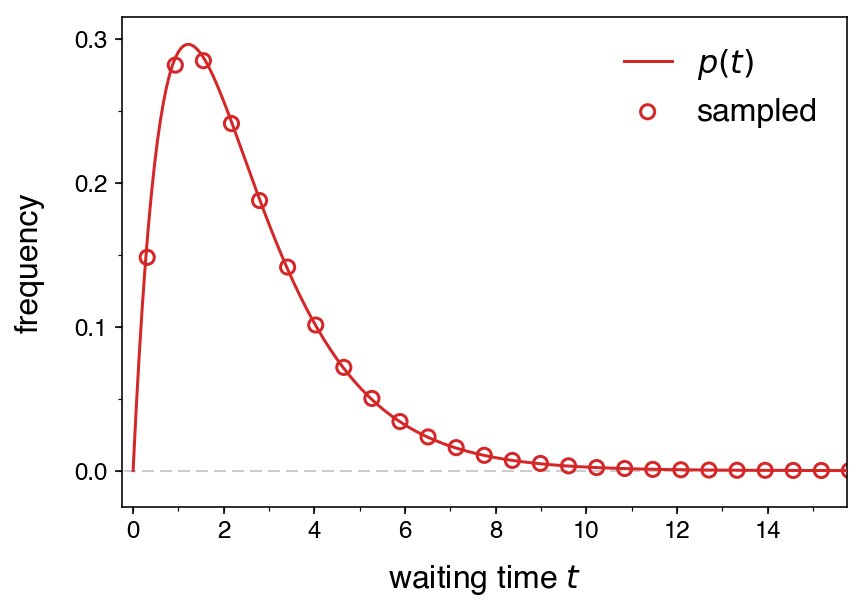

In [264]:
plot_scatter_histogram(scatterData2, dist2)

For further information on this topic, vave a look at the following two sources:

* Rob Phillips et al. - **Physical Biology of the Cell** (2nd edition, 2013).
They discuss this issue in the context of molecular motors, where multiple internal states of a molecular motor
are often hidden, i.e. not accessible to direct experimental observation. However sometimes one can reveal the existence of such states by analyzing the corresponding waiting-time distributions.

* D. L. Floyd et al. - Analysis of Kinetic Intermediates in Single-Particle Dwell-Time Distributions, *Biophysical Journal*, **99**, 360-366, 2010.